<a href="https://colab.research.google.com/github/man-is-h/uci_ml_models/blob/master/Student_grade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip
!unzip student.zip

--2020-07-22 19:02:46--  http://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20478 (20K) [application/x-httpd-php]
Saving to: ‘student.zip.3’

student.zip.3       100%[===================>]  20.00K  --.-KB/s    in 0.1s    

2020-07-22 19:02:46 (147 KB/s) - ‘student.zip.3’ saved [20478/20478]

Archive:  student.zip
replace student-mat.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: student-mat.csv         
  inflating: student-por.csv         
  inflating: student-merge.R         
  inflating: student.txt             


In [ ]:
#Dataset for maths class
df = pd.read_csv('student-mat.csv', sep = ';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
def get_label_encodings(dataset):
  df = dataset.copy()
  cols = np.array(df.columns)
  for col in cols:
    if df[col].dtype == 'O' :
      df[col] = pd.Categorical(df[col])
      df[col] = df[col].cat.codes
  return df

get_encoded_df = get_label_encodings(df)
get_encoded_df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


In [ ]:
get_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int8 
 1   sex         395 non-null    int8 
 2   age         395 non-null    int64
 3   address     395 non-null    int8 
 4   famsize     395 non-null    int8 
 5   Pstatus     395 non-null    int8 
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   Mjob        395 non-null    int8 
 9   Fjob        395 non-null    int8 
 10  reason      395 non-null    int8 
 11  guardian    395 non-null    int8 
 12  traveltime  395 non-null    int64
 13  studytime   395 non-null    int64
 14  failures    395 non-null    int64
 15  schoolsup   395 non-null    int8 
 16  famsup      395 non-null    int8 
 17  paid        395 non-null    int8 
 18  activities  395 non-null    int8 
 19  nursery     395 non-null    int8 
 20  higher      395 non-null    int8

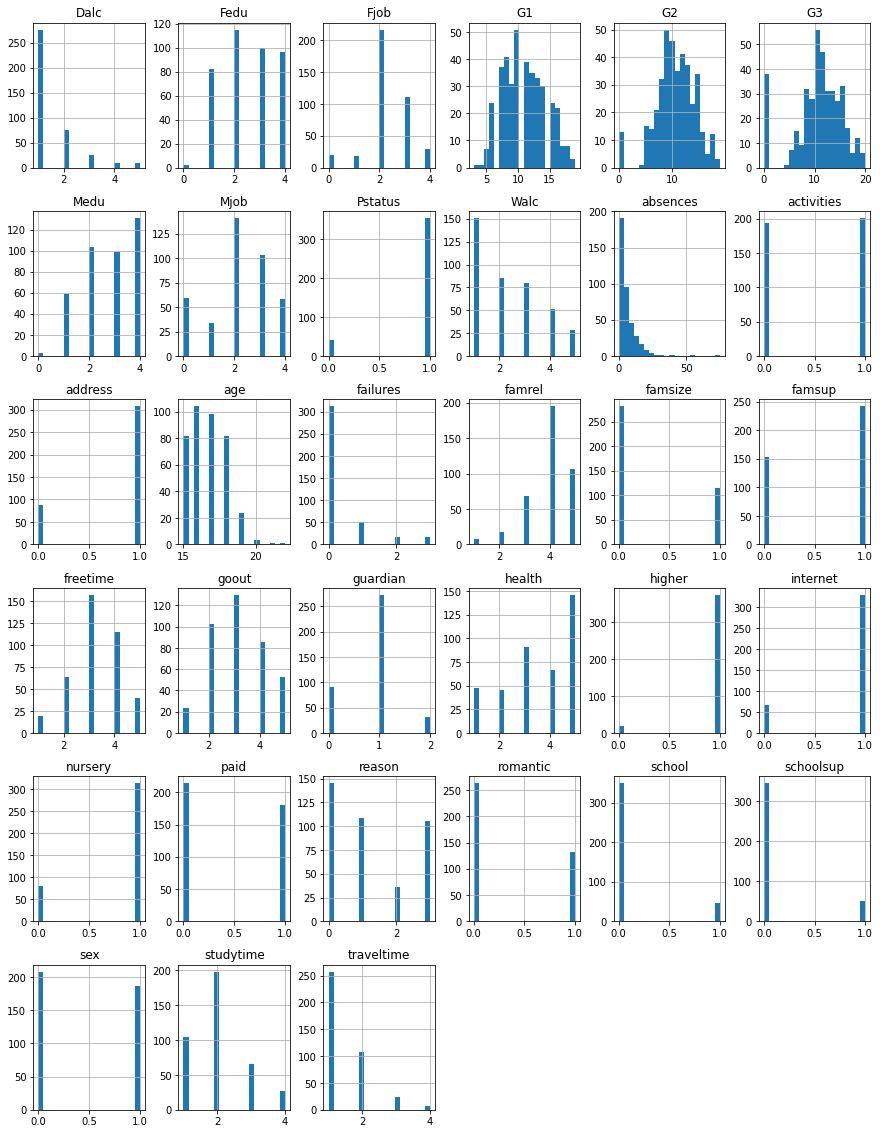

In [ ]:
#Histogram analysis
%matplotlib inline
import matplotlib.pyplot as plt
get_encoded_df.hist(bins =20, figsize = (15,20))
plt.show()


In [ ]:
#correlation matrix

matrix = df.corr()
matrix = matrix.abs()
matrix.style.background_gradient(cmap = 'coolwarm')

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,0.163658,0.163438,0.070641,0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,0.062187,0.175230,0.064081,0.143474,0.161579
Medu,0.163658,1.000000,0.623455,0.171639,0.064944,0.236680,0.003914,0.030891,0.064094,0.019834,0.047123,0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,0.163438,0.623455,1.000000,0.158194,0.009175,0.250408,0.001370,0.012846,0.043105,0.002386,0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,0.171639,0.158194,1.000000,0.100909,0.092239,0.016808,0.017025,0.028540,0.138325,0.134116,0.007501,0.012944,0.093040,0.153198,0.117142
studytime,0.004140,0.064944,0.009175,0.100909,1.000000,0.173563,0.039731,0.143198,0.063904,0.196019,0.253785,0.075616,0.062700,0.160612,0.135880,0.097820
failures,0.243665,0.236680,0.250408,0.092239,0.173563,1.000000,0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,0.354718,0.355896,0.360415
famrel,0.053940,0.003914,0.001370,0.016808,0.039731,0.044337,1.000000,0.150701,0.064568,0.077594,0.113397,0.094056,0.044354,0.022168,0.018281,0.051363
freetime,0.016434,0.030891,0.012846,0.017025,0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,0.058078,0.012613,0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,0.009577,0.044302,0.149104,0.162250,0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,0.196019,0.136047,0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,0.094159,0.064120,0.054660


In [ ]:
#ready the dataset
Y = np.array(df[['G1','G2','G3']])

def n_classification_criteria(Y, n):
  '''
  Inputs:
  Y == Labels
  n = 2 or 5
  '''
  if n==2:
    Y = (Y>10)*1
  elif n==5:
    Y = (Y>16)*1 + (Y>14)*1 + (Y>12)*1 + (Y>10)*1
  else :
    assert False, 'Wrong n!'
  return Y

Y_2 = n_classification_criteria(Y, 2)
Y_5 = n_classification_criteria(Y, 5)
del df['G1']
del df['G2']
del df['G3']


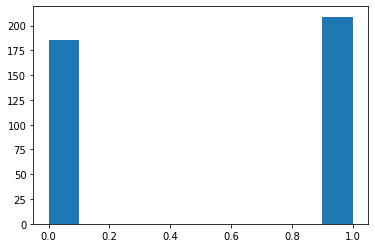

(array([186.,   0.,  78.,   0.,   0.,  58.,   0.,  49.,   0.,  24.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

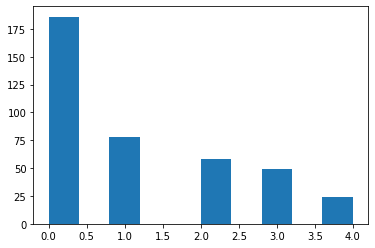

In [ ]:
plt.hist(Y_2[:,2])
plt.show()
plt.hist(Y_5[:, 2])

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4


In [ ]:
def get_one_hot_enc(dataset):
  df = dataset.copy()
  cols = np.array(df.columns)
  for col in cols:
    if df[col].dtype == 'O' :
      if len(df[col].value_counts()) == 2:
        df[col] = pd.Categorical(df[col])
        df[col] = df[col].cat.codes

      else:
        dum_df = pd.get_dummies(df, columns = [col], prefix = [col])
        df = dum_df
  return df 

df_one_hot = get_one_hot_enc(df)
X = np.array(get_encoded_df)
df_one_hot.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,0,0,17,1,0,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,0,0,15,1,1,1,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,0,0,15,1,0,1,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


In [ ]:
#train test split

def train_test_split(X, Y, Y_2, Y_5, ratio):
  idx = np.random.rand(len(X)) < ratio

  X_train = X[idx]
  Y_train = Y[idx]
  Y_2_train = Y_2[idx]
  Y_5_train = Y_5[idx]

  X_test = X[~idx]
  Y_test = Y[~idx]
  Y_2_test = Y_2[~idx]
  Y_5_test = Y_5[~idx]

  return X_train, Y_train, Y_2_train, Y_5_train, X_test, Y_test, Y_2_test, Y_5_test

X_train, Y_train, Y_2_train, Y_5_train, X_test, Y_test, Y_2_test, Y_5_test = train_test_split(X, Y, Y_2, Y_5, 0.9)



In [ ]:
#normalization/scaling

def min_max_scaling(X, Y, norm_dict = None):
  if not norm_dict is None:
    X = (X - norm_dict['X'][0])/(norm_dict['X'][1] - norm_dict['X'][0] )
    Y = (Y - norm_dict['Y'][0])/(norm_dict['Y'][1] - norm_dict['Y'][0])
    return X,Y

  norm_dict = {}
  norm_dict['X'] = [X.min(axis = 0), X.max(axis = 0)]
  norm_dict['Y'] = [Y.min(axis = 0), Y.max(axis = 0)]

  X = (X - X.min(axis = 0))/(X.max(axis = 0) - X.min(axis = 0))
  Y = (Y - Y.min(axis = 0))/(Y.max(axis = 0) - Y.min(axis = 0))

  return X, Y, norm_dict

X_train, Y_train, norm_dict = min_max_scaling(X_train, Y_train)
X_test, Y_test = min_max_scaling(X_test, Y_test, norm_dict)
norm_dict

{'X': [array([ 0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  0,  3,  0,  0]),
  array([ 1,  1, 22,  1,  1,  1,  4,  4,  4,  4,  3,  2,  4,  4,  3,  1,  1,
          1,  1,  1,  1,  1,  1,  5,  5,  5,  5,  5,  5, 75, 19, 19, 20])],
 'Y': [array([3, 0, 0]), array([19, 19, 20])]}

In [ ]:
#initialize weights

def initialize_weights(input_size):
  weights = np.random.rand(input_size, 1)
  bias = 0.0

  return weights, bias

In [ ]:
#sigmoid function
def sigmoid(z):
  sig = 1/(1+ np.exp(-z))
  return sig

In [ ]:
#forward prop

def forward_prop(X, weights, bias):
  output = np.dot(X, weights) + bias
  preds = sigmoid(output)
  return preds


#cross entropy loss

def cross_entropy_loss(y, preds):
  loss = np.mean(-y*np.log(preds) - (1-y)*np.log(1 - preds))
  return loss

#compute gradient 

def compute_gradient(x, y, preds):
  error = preds - y
  w_grad = np.dot(np.transpose(x), error).reshape(-1,1)/ x.shape[0]
  b_grad = np.mean(error)
  return w_grad, b_grad

#gradient descent

def gradient_descent(weights, bias, w_grad, b_grad, learning_rate = 0.01):
  weights = weights - learning_rate * w_grad
  bias = bias - learning_rate * b_grad

  return weights, bias


#shuffle

def shuffle(X, Y):
  indices = np.arange(len(Y))
  np.random.shuffle(indices)
  x = X[indices]
  y = Y[indices]
  return x, y

# train

def train(X, Y, epochs = 200, batch_size = 32, learning_rate = 0.01):
  input_size = X.shape[1]
  weights, bias = initialize_weights(X.shape[1])
  for ep in range (epochs):
    x, y = shuffle(X, Y)
    losses = []
    for s_idx in range(0, len(Y), batch_size):
      e_idx = min(len(Y), s_idx + batch_size)
      x_batch = x[s_idx:e_idx]
      y_batch = y[s_idx:e_idx]
      #forward prop
      pred = forward_prop(x_batch, weights, bias)
      #loss aggregation
      losses.append(cross_entropy_loss(y_batch, pred))
      w_grad, b_grad = compute_gradient(x_batch, y_batch, pred)
      weights, bias = gradient_descent(weights, bias, w_grad, b_grad, learning_rate)
    
    print("Epoch: ", ep)
    print("MSE: ", np.mean(losses))
  return weights, bias




In [ ]:
#test 
def test(X, Y, weights, bias, batch_size = 32):
  losses = []
  correct = 0
  for s_idx in range(0, len(Y), batch_size):
    e_idx = min(len(Y), s_idx + batch_size)
    x_batch = X[s_idx:e_idx]
    y_batch = Y[s_idx:e_idx]
    pred = forward_prop(x_batch, weights, bias)
    losses.append(cross_entropy_loss(y_batch, pred))
    correct += np.sum((pred>0.5) == y_batch)

  print("MSE: ", np.mean(losses))
  print("Accuracy: ", round(correct/len(Y), 3))

In [ ]:
weights, bias = train(X_train, Y_2_train[:,2].reshape(-1,1), epochs = 2000, learning_rate=0.1, batch_size=64)

Epoch:  0
MSE:  2.5625083130016297
Epoch:  1
MSE:  1.3588577302141618
Epoch:  2
MSE:  0.7654269002161741
Epoch:  3
MSE:  0.6770613960601873
Epoch:  4
MSE:  0.6643055667644427
Epoch:  5
MSE:  0.6429125746127928
Epoch:  6
MSE:  0.638000039596858
Epoch:  7
MSE:  0.6195555754019658
Epoch:  8
MSE:  0.6067559080424973
Epoch:  9
MSE:  0.5986114764122075
Epoch:  10
MSE:  0.5935513572863318
Epoch:  11
MSE:  0.5789869000384916
Epoch:  12
MSE:  0.5706879134185702
Epoch:  13
MSE:  0.5645896314096821
Epoch:  14
MSE:  0.5557424928282856
Epoch:  15
MSE:  0.5400608155172087
Epoch:  16
MSE:  0.5308584051829052
Epoch:  17
MSE:  0.5257247029156207
Epoch:  18
MSE:  0.5169953994842403
Epoch:  19
MSE:  0.5112966532220481
Epoch:  20
MSE:  0.5039303159315481
Epoch:  21
MSE:  0.4998576860929535
Epoch:  22
MSE:  0.49514337897254385
Epoch:  23
MSE:  0.48328851002339374
Epoch:  24
MSE:  0.48106392141640963
Epoch:  25
MSE:  0.4741417784842379
Epoch:  26
MSE:  0.4688506574086335
Epoch:  27
MSE:  0.46665298573294467

In [ ]:
test(X_test, Y_2_test[:,2].reshape(-1,1), weights, bias, batch_size=16)

MSE:  0.19801404683735835
Accuracy:  0.932


In [ ]:
test(X_train, Y_2_train[:,2].reshape(-1,1), weights, bias, batch_size=16)

MSE:  0.11832228207356606
Accuracy:  0.966
